<a href="https://colab.research.google.com/github/miguelangel18241/Probabilities/blob/main/IDS_Assessment_3_Miguel_Zorrilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please find the dataset attached in the OneDrive I shared with you.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Setting visualization style
sns.set(style='whitegrid')


In [ ]:
df = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:

file_name = next(iter(df.keys()))
data = pd.read_csv(file_name)

#Missing Values
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)



Missing values per column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                       

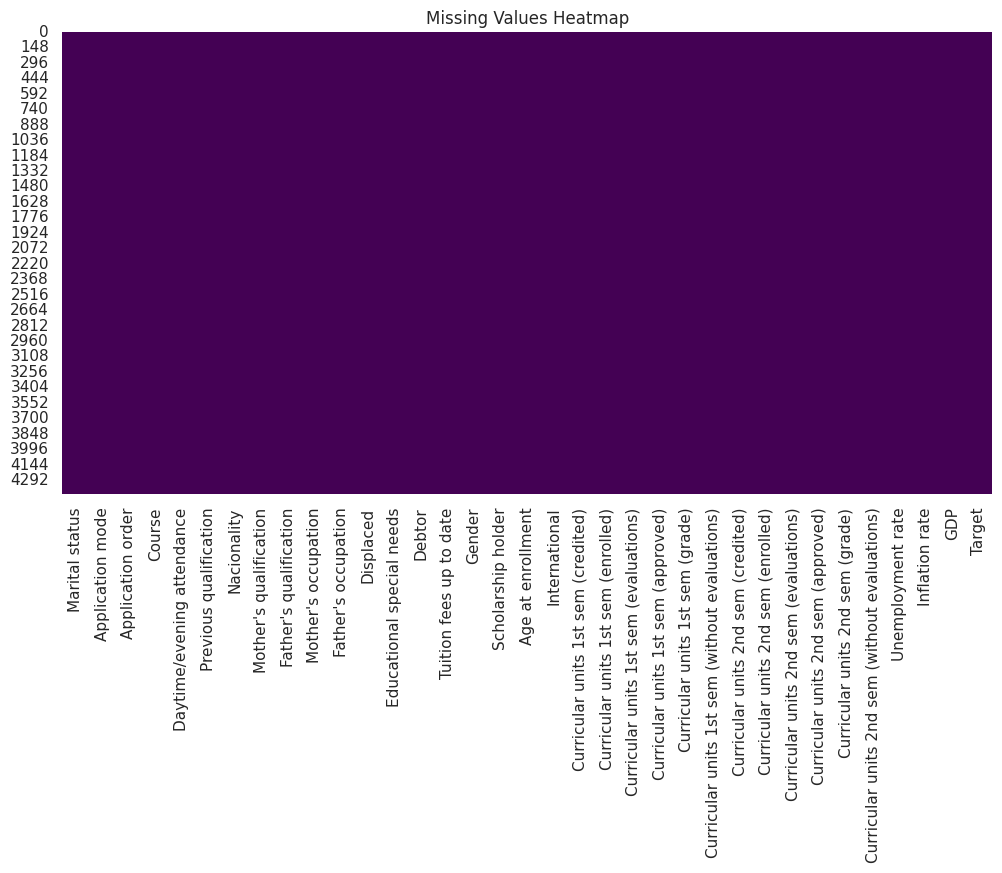

In [ ]:

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#Having a look at the statistics of the dataset:
summary_stats = data.describe(include='all')
print("\nSummary statistics:")
print(summary_stats)
age_stats = data['Age'].describe()
print("\nAge statistics:")
print(age_stats)



Summary statistics:
        Marital status  Application mode  Application order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571          6.886980           1.727848     9.899186   
std           0.605747          5.298964           1.313793     4.331792   
min           1.000000          1.000000           0.000000     1.000000   
25%           1.000000          1.000000           1.000000     6.000000   
50%           1.000000          8.000000           1.000000    10.000000   
75%           1.000000         12.000000           2.000000    13.000000   
max           6.000000         18.000000           9.000000    17.000000   

        Daytime/evening attendance  Previous qualification  Nacion


Age statistics:
count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: age_at_enrollment, dtype: float64


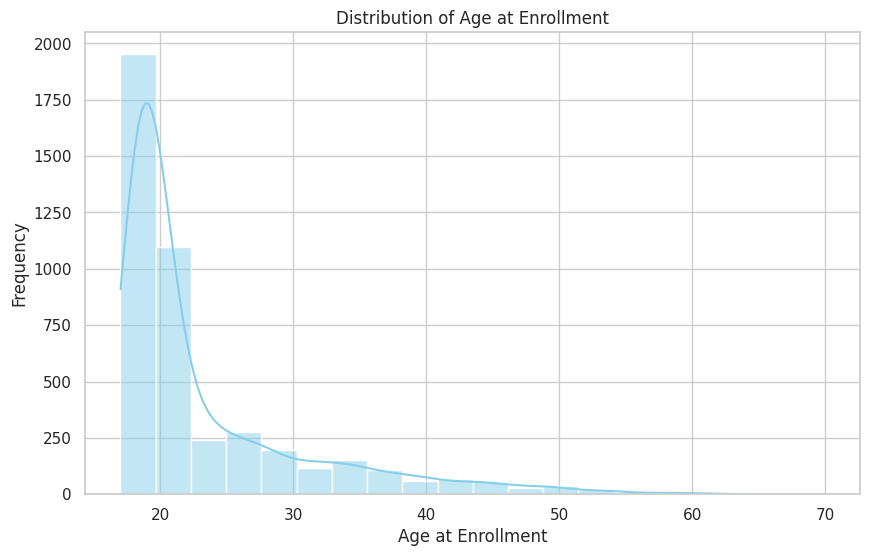

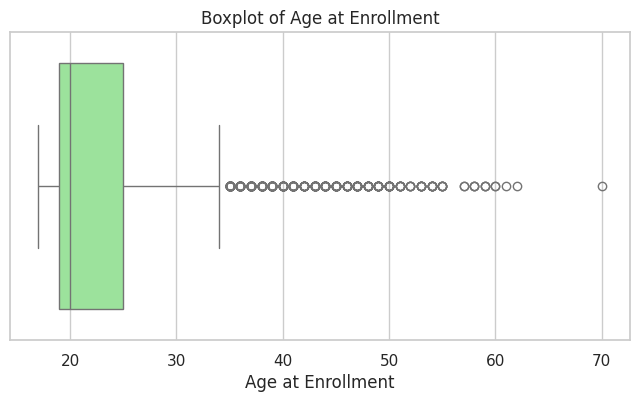

In [ ]:
#Columns that need to be renamed for readability:
data.rename(columns={'Age at enrollment': 'age_at_enrollment'}, inplace=True)
age_stats = data['age_at_enrollment'].describe()
print("\nAge statistics:")
print(age_stats)
# Histogram for age_at_enrollment
plt.figure(figsize=(10, 6))
sns.histplot(data['age_at_enrollment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot for age_at_enrollment
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['age_at_enrollment'], color='lightgreen')
plt.title('Boxplot of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.show()


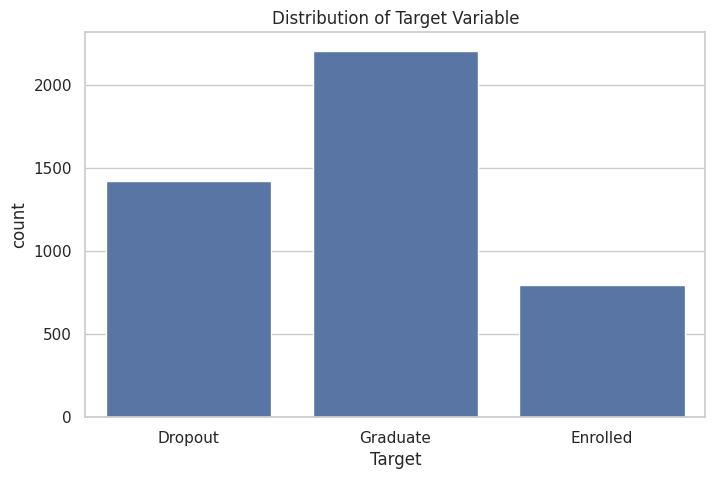

In [ ]:

# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

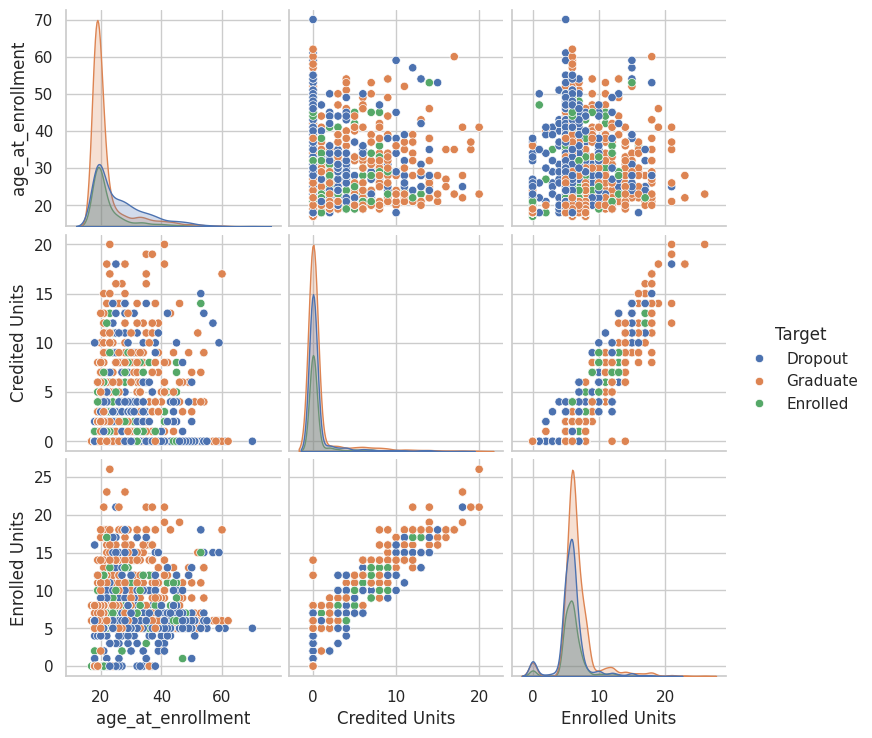

In [ ]:
# Rename columns to shorter names
data.rename(columns={
    'Curricular units 1st sem (credited)': 'Credited Units',
    'Curricular units 1st sem (enrolled)': 'Enrolled Units',
    'Curricular units 1st sem (evaluations)': 'Evaluated Units',
    'Curricular units 1st sem (approved)': 'Approved Units'
}, inplace=True)

sns.pairplot(data, hue='Target', vars=['age_at_enrollment', 'Credited Units', 'Enrolled Units'])
plt.show()


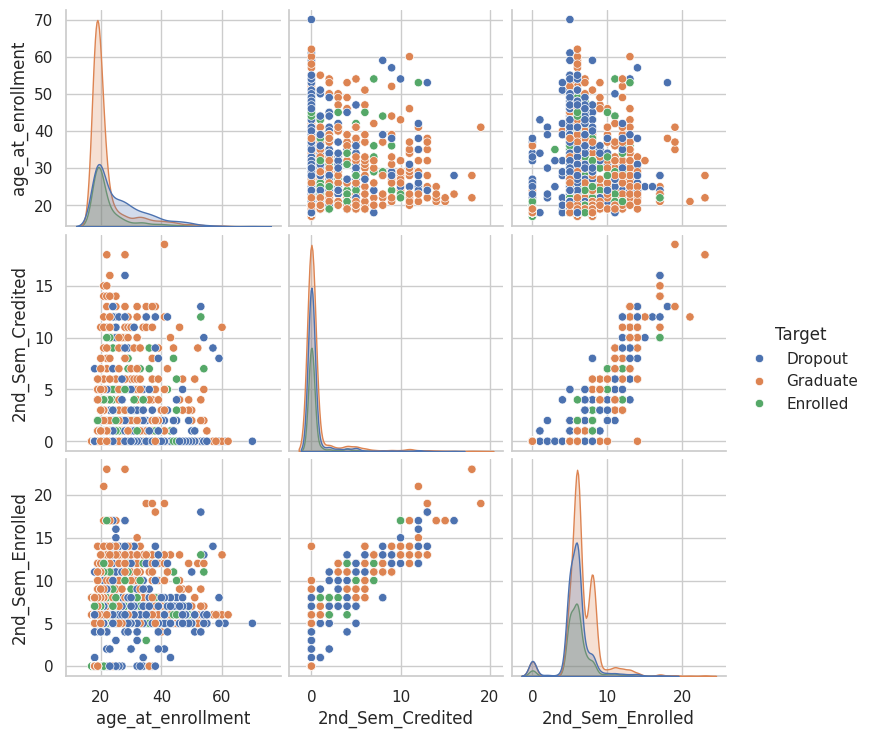

In [ ]:
# Rename columns for the second semester to shorter names
data.rename(columns={
    'Curricular units 2nd sem (credited)': '2nd_Sem_Credited',
    'Curricular units 2nd sem (enrolled)': '2nd_Sem_Enrolled',
    'Curricular units 2nd sem (evaluations)': '2nd_Sem_Evaluated',
    'Curricular units 2nd sem (approved)': '2nd_Sem_Approved',
    'Curricular units 2nd sem (grade)': '2nd_Sem_Grade',
    'Curricular units 2nd sem (without evaluations)': '2nd_Sem_No_Evals'
}, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Target', vars=['age_at_enrollment', '2nd_Sem_Credited', '2nd_Sem_Enrolled'])
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Target' column to convert it to numeric
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])

# Create a mapping from the original categorical label to the new numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")


Label mapping:
Dropout: 0
Enrolled: 1
Graduate: 2


Label mapping:
Dropout: 0
Enrolled: 1
Graduate: 2


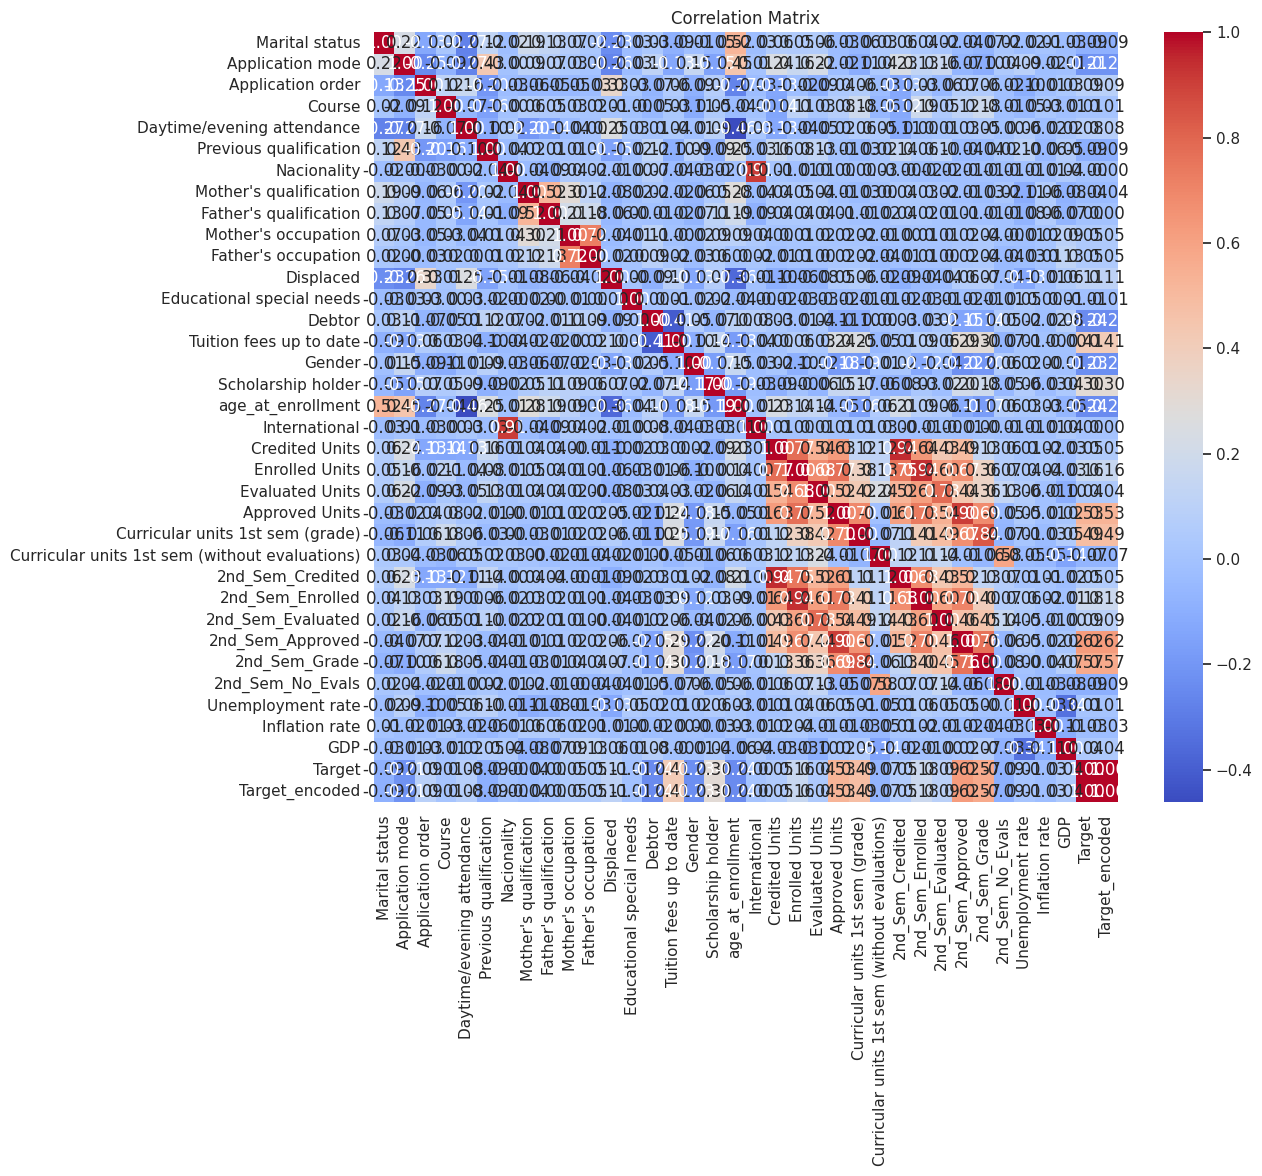

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame already loaded

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Target' column to convert it to numeric and replace it in the DataFrame
data['Target'] = label_encoder.fit_transform(data['Target'])

# Create a mapping from the original categorical label to the new numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

# Ensure to include only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Rename the column from 'nacionality' to 'nationality'
data.rename(columns={'Nacionality': 'nationality'}, inplace=True)


In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,nationality,Mother's qualification,Father's qualification,Mother's occupation,...,2nd_Sem_Enrolled,2nd_Sem_Evaluated,2nd_Sem_Approved,2nd_Sem_Grade,2nd_Sem_No_Evals,Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,2
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,2
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,2


In [ ]:
# Calculate correlation between GDP and the encoded nationality
correlation_value = data['GDP'].corr(data['nationality'])
print(f"Correlation between GDP and Nationality: {correlation_value}")


Correlation between GDP and Nationality: 0.044562536032255844


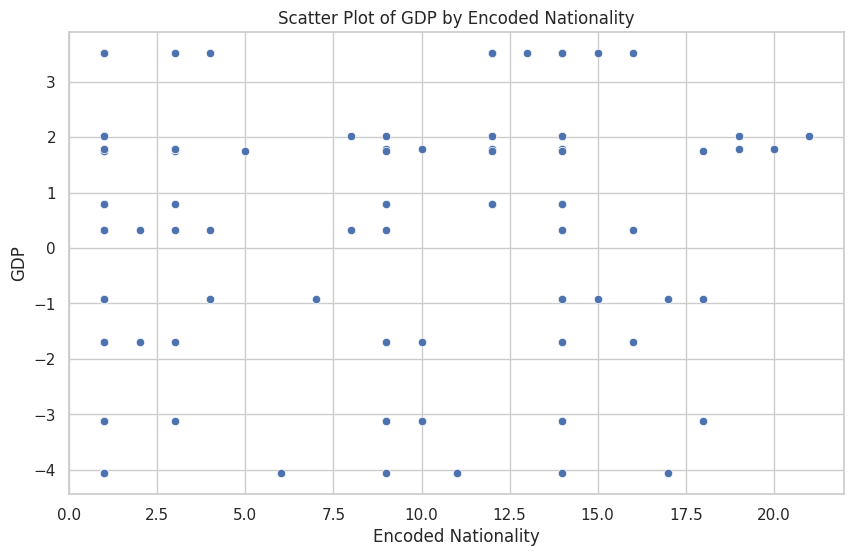

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has columns 'GDP' and 'nationality_encoded'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nationality', y='GDP', data=data)
plt.xlabel('Encoded Nationality')
plt.ylabel('GDP')
plt.title('Scatter Plot of GDP by Encoded Nationality')
plt.show()


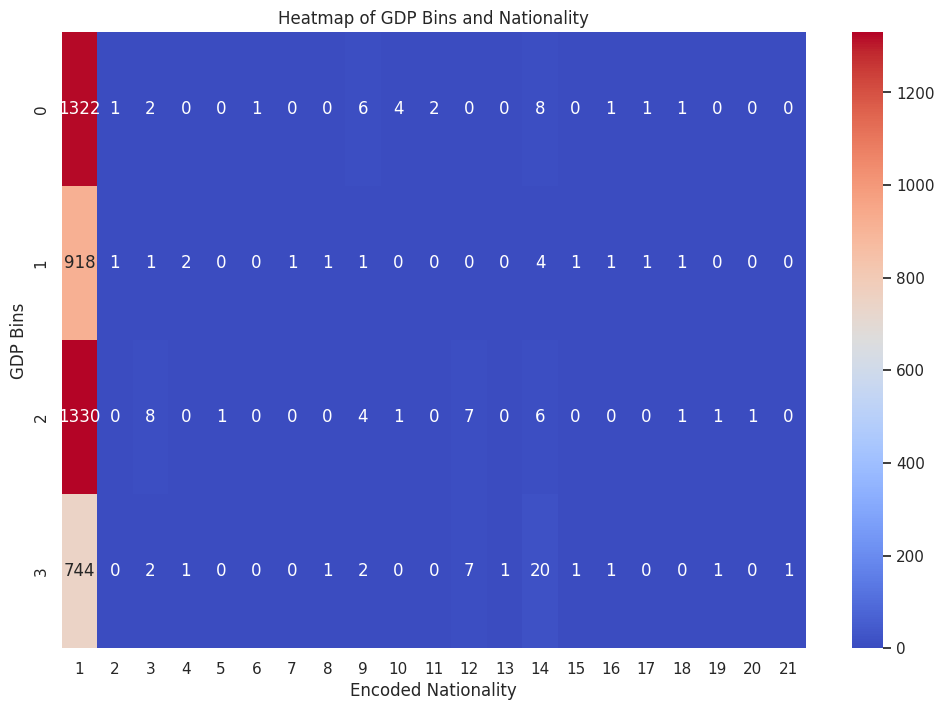

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bin the GDP data
data['GDP_bins'] = pd.qcut(data['GDP'], q=4, labels=False)

# Create a crosstabulation
gdp_nationality_crosstab = pd.crosstab(data['GDP_bins'], data['nationality'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gdp_nationality_crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of GDP Bins and Nationality')
plt.xlabel('Encoded Nationality')
plt.ylabel('GDP Bins')
plt.show()


In [ ]:
data.rename(columns={'Scholarship holder': 'has_scholarship'}, inplace=True)

In [ ]:
num_scholarship_students = data['has_scholarship'].sum()
# Total number of students in the dataset
total_students = data.shape[0]

# Number of students with scholarships
num_scholarship_students = 1099  # As you previously calculated

# Calculate the percentage of students with scholarships
percentage_scholarship_students = (num_scholarship_students / total_students) * 100

print(f"Percentage of students with scholarships: {percentage_scholarship_students:.2f}%")

print(f"Total number of students with scholarships: {num_scholarship_students}")


Percentage of students with scholarships: 24.84%
Total number of students with scholarships: 1099


Number of students with scholarships by academic status:
2: 835
0: 134
1: 130


<ipython-input-58-40b0067b08a4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scholarship_status_counts.index, y=scholarship_status_counts.values, palette='viridis')


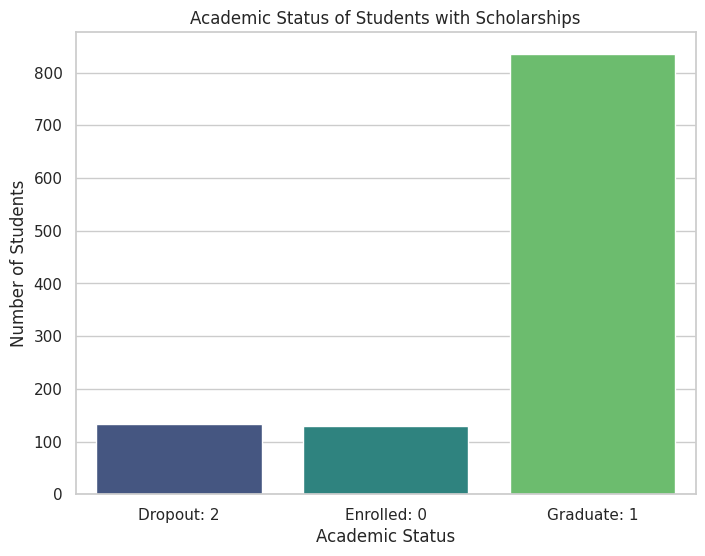

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'Target' is the column with actual labels
# Filter the dataset for students with a scholarship
scholarship_students = data[data['has_scholarship'] == 1]

# Count the number of students in each category (Dropout, Graduate, Enrolled) for those with scholarships
scholarship_status_counts = scholarship_students['Target'].value_counts()

# Print the results
print("Number of students with scholarships by academic status:")
for status, count in scholarship_status_counts.items():
    print(f"{status}: {count}")

# Define a mapping of categories to the desired labels
status_labels = {
    0: 'Enrolled: 0',
    1: 'Graduate: 1',
    2: 'Dropout: 2'
}

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=scholarship_status_counts.index, y=scholarship_status_counts.values, palette='viridis')

# Customize the x-axis labels using the status_labels mapping
plt.xticks(ticks=range(len(scholarship_status_counts)), labels=[status_labels[label] for label in scholarship_status_counts.index])

plt.title('Academic Status of Students with Scholarships')
plt.xlabel('Academic Status')
plt.ylabel('Number of Students')
plt.show()


Distribution of Marital Status:
marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


<ipython-input-60-c14a77a3a09c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='pastel')


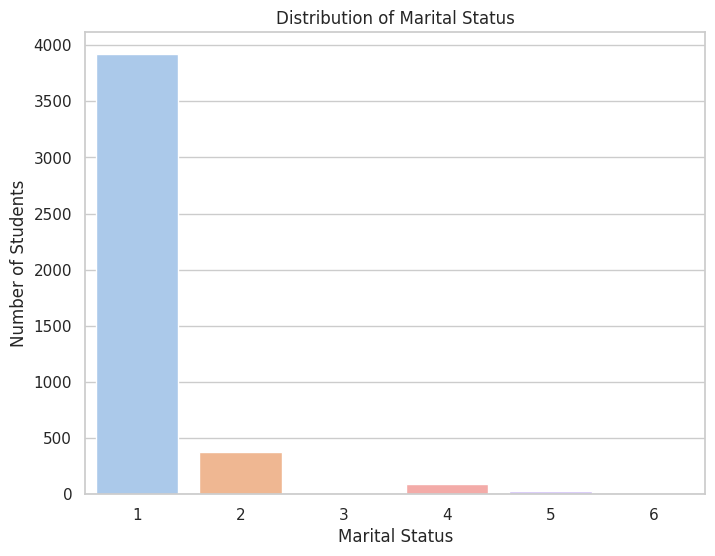

In [ ]:
data.rename(columns={'Marital status': 'marital_status'}, inplace=True)
# Count the number of students in each marital status category

marital_status_counts = data['marital_status'].value_counts()

# Print the counts
print("Distribution of Marital Status:")
print(marital_status_counts)

# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='pastel')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()


Marital Status vs. Academic Outcomes:
Target             0    1     2
marital_status                 
1               1184  720  2015
2                179   52   148
3                  1    2     1
4                 42   16    33
5                 11    3    11
6                  4    1     1


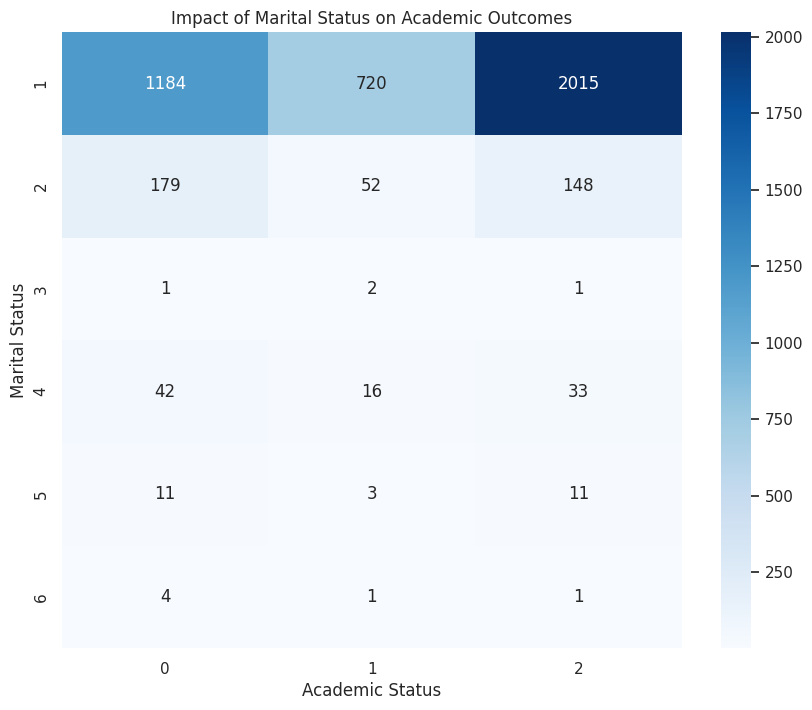

In [ ]:
# Create a crosstab to see the relationship between marital status and academic target
marital_status_outcomes = pd.crosstab(data['marital_status'], data['Target'])

# Print the crosstab
print("Marital Status vs. Academic Outcomes:")
print(marital_status_outcomes)

# Plot the crosstab results
plt.figure(figsize=(10, 8))
sns.heatmap(marital_status_outcomes, annot=True, fmt='d', cmap='Blues')
plt.title('Impact of Marital Status on Academic Outcomes')
plt.xlabel('Academic Status')
plt.ylabel('Marital Status')
plt.show()



In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame and it has been loaded properly

# Count the number of students who are not up to date with their tuition fees
not_up_to_date = data[data['Tuition fees up to date'] == 0]
up_to_date = data[data['Tuition fees up to date'] == 1]

# Calculate the total number of students not up to date with tuition fees
total_not_up_to_date = not_up_to_date.shape[0]
total_up_to_date = up_to_date.shape[0]

print(f"Total number of students not up to date with tuition fees: {total_not_up_to_date}")
print(f"Total number of students up to date with tuition fees: {total_up_to_date}")



Total number of students not up to date with tuition fees: 528
Total number of students up to date with tuition fees: 3896


<ipython-input-66-57b73a9214ed>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')


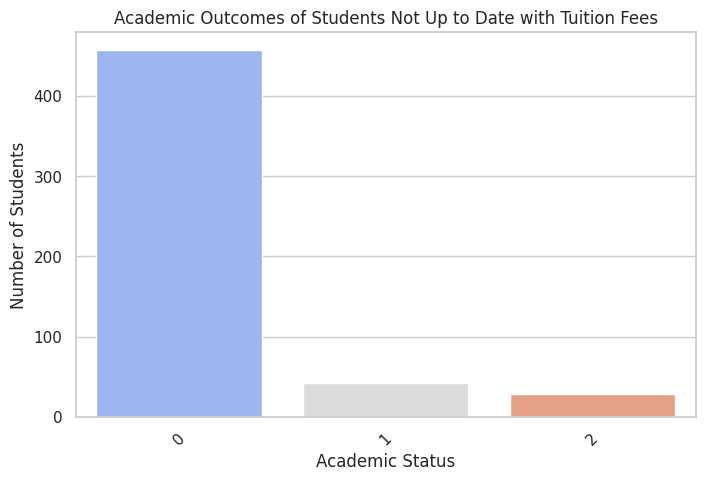

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it has been loaded properly

# Filter the students who are not up to date with their tuition fees
not_up_to_date = data[data['Tuition fees up to date'] == 0]

# Count how many dropped out, graduated, or are still enrolled
status_counts = not_up_to_date['Target'].value_counts()

# Create a bar plot to show the distribution of academic outcomes among these students
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='coolwarm')
plt.title('Academic Outcomes of Students Not Up to Date with Tuition Fees')
plt.xlabel('Academic Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()


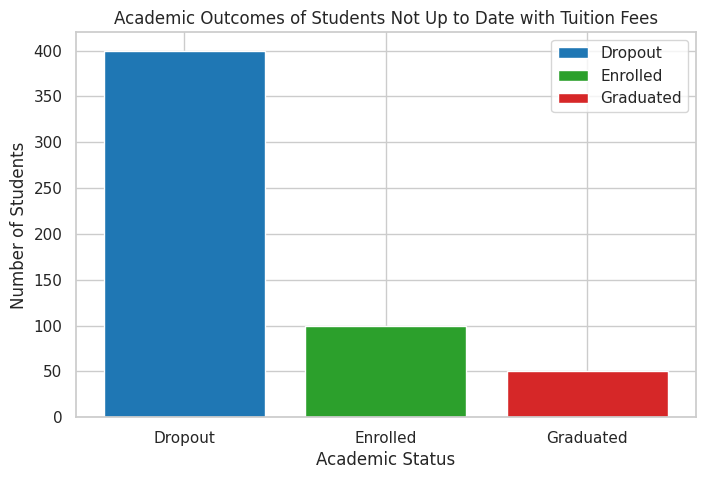

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
status_counts = {'Dropout': 400, 'Enrolled': 100, 'Graduated': 50}  # Example counts

# Colors for each category
colors = ['#1f77b4', '#2ca02c', '#d62728']

# Creating the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(status_counts.keys(), status_counts.values(), color=colors)

# Adding a legend
plt.legend(bars, ['Dropout', 'Enrolled', 'Graduated'], loc='upper right')

plt.title('Academic Outcomes of Students Not Up to Date with Tuition Fees')
plt.xlabel('Academic Status')
plt.ylabel('Number of Students')
plt.show()
